#  Analysis of Network Topologies

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## Network Size

The size of a network is characterized by the numbers of nodes and edges in it.

In [2]:
g = nx.karate_club_graph()
g.number_of_nodes()

34

In [3]:
g.number_of_edges()

78

The density of a network is the fraction between 0 and 1 that tells us what portion of all possible edges are actually realized in the network. For a network $G$ made of $n$ nodes and $m$ edges, the density $\rho(G)$ is given by

- an undirected network
$$\rho(G) = \frac{m}{\frac{n(n-1)}{2}} = \frac{2m}{n(n-1)}$$

- a directed network 
$$\rho(G) = \frac{m}{n(n-1)}$$

In [4]:
g = nx.karate_club_graph()
nx.density(g)

0.13903743315508021

In [5]:
n = g.number_of_nodes()
m = g.number_of_edges()

rho = 2*m / (n*(n-1))
rho

0.13903743315508021

## Network Percolation

The size and density can still predict about networks. One such example is network percolation.

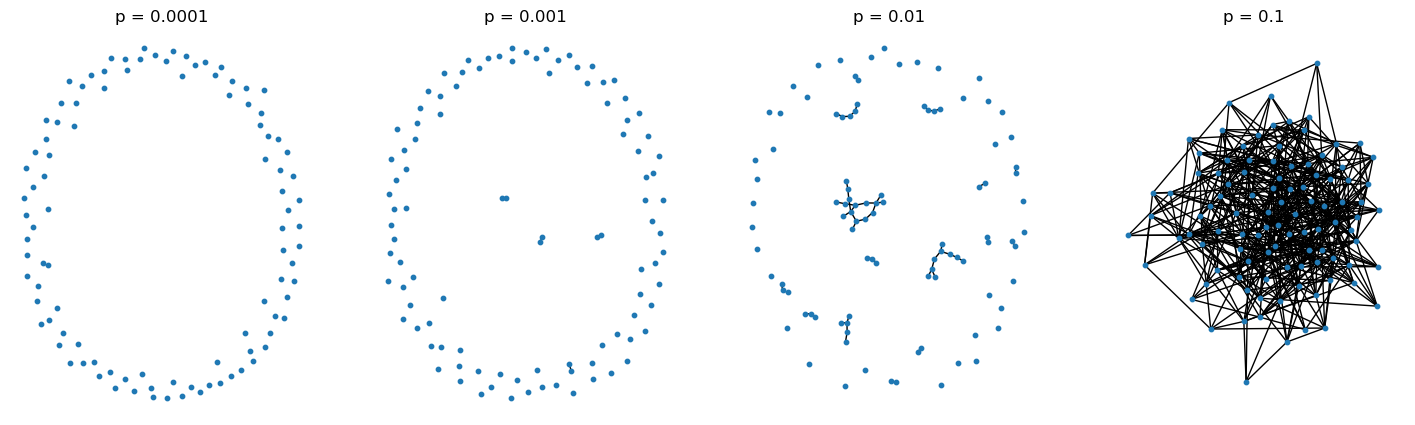

In [6]:
plt.figure(figsize=(18, 5))
for i, p in [(1, 0.0001), (2, 0.001), (3, 0.01), (4, 0.1)]:
    plt.subplot(1, 4, i)
    plt.title('p = ' + str(p))
    g = nx.erdos_renyi_graph(100, p)
    nx.draw(g, node_size = 10)

they are defined as the connected components whose size $s(n)$ has the following property
$$\lim_{n\to\infty}\frac{s(n)}{n}=c>0$$
where $n$ is the number of nodes.

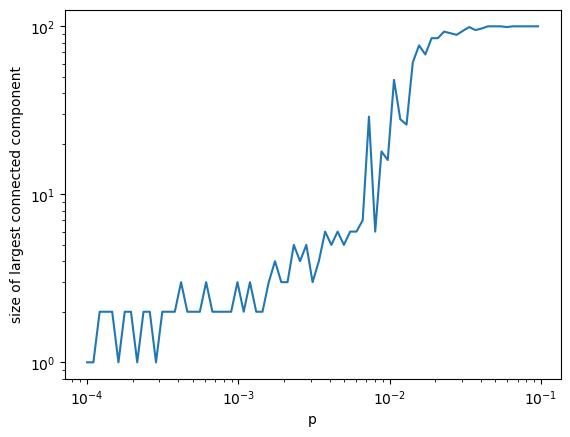

In [7]:
p = 0.0001
pdata = []
gdata = []

while p < 0.1:
    pdata.append(p)
    g = nx.erdos_renyi_graph(100, p)
    ccs = nx.connected_components(g)
    gdata.append(max(len(cc) for cc in ccs))
    p *= 1.1
    
plt.loglog(pdata, gdata)
plt.xlabel('p')
plt.ylabel('size of largest connected component')
plt.show()

##  Shortest Path Length

Many of the tools used here are actually borrowed from social network analysis developed and used in sociology

Many of the tools used here are actually borrowed from social network analysis developed and used in sociology

In [8]:
g = nx.karate_club_graph()
nx.shortest_path_length(g, 16, 25)

4

In [9]:
nx.shortest_path(g, 16, 25)

[16, 5, 0, 31, 25]

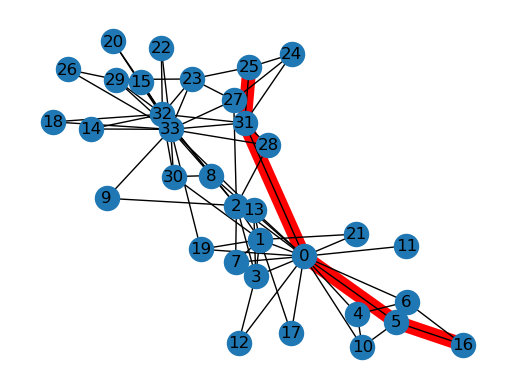

In [11]:
g = nx.karate_club_graph()
positions = nx.spring_layout(g)

path = nx.shortest_path(g, 16, 25)
edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
nx.draw_networkx_edges(g, positions, edgelist = edges, edge_color = 'r', width = 10)
nx.draw(g, positions, with_labels = True)
plt.show()

### Characteristic path length
$$L=\frac{\sum_{i, j}d(i\to j)}{n(n-1)}$$

It calculates the average length of shortest paths for all possible node pairs in the network, giving an expected distance between two randomly chosen nodes. This is an intuitive characterization of how big (or
small) the world represented by the network is.


### Eccentricity
$$\epsilon(i) = \underset{j}{max\ } d(i\to j)$$
This metric is defined for each node and gives the maximal shortest path length a node can have with any other node in the network. This tells how far the node is to the farthest point in the network.

### Diameter
$$D = \underset{i}{max\ }\epsilon (i)$$
This metric gives the maximal eccentricity in the network. Nodes whose eccentricity is D are called peripheries.

### Radius
$$R = \underset{i}{min\ }\epsilon(i)$$
This metric gives the minimal eccentricity in the network. Nodes whose eccentricity is R are called
centers.

In [12]:
g = nx.karate_club_graph()
nx.average_shortest_path_length(g)

2.408199643493761

In [13]:
nx.eccentricity(g)

{0: 3,
 1: 3,
 2: 3,
 3: 3,
 4: 4,
 5: 4,
 6: 4,
 7: 4,
 8: 3,
 9: 4,
 10: 4,
 11: 4,
 12: 4,
 13: 3,
 14: 5,
 15: 5,
 16: 5,
 17: 4,
 18: 5,
 19: 3,
 20: 5,
 21: 4,
 22: 5,
 23: 5,
 24: 4,
 25: 4,
 26: 5,
 27: 4,
 28: 4,
 29: 5,
 30: 4,
 31: 3,
 32: 4,
 33: 4}

In [14]:
nx.diameter(g)

5

In [15]:
nx.periphery(g)

[14, 15, 16, 18, 20, 22, 23, 26, 29]

In [16]:
nx.radius(g)

3

In [17]:
nx.center(g)

[0, 1, 2, 3, 8, 13, 19, 31]

## Centralities and Coreness
The eccentricity of nodes discussed above can be used to detect which nodes are most central in a network.

This can be useful because, for example, if you send out a message
from one of the center nodes with minimal eccentricity, the message will reach every
single node in the network in the shortest period of time.

### Degree cetrality
$$C_D(i) = \frac{\deg(i)}{n-1}$$

### Betweenness centrality
$$C_B(i) = \frac{1}{(n-1)(n-2)}\sum_{j\neq i, k\neq i, j\neq k}\frac{N_{sp}(j\overset{i}{\to} k)}{N_{sp}(j\to k)}$$

where $N_{sp}(j\to k)$ is the number of shortest paths from node $j$ to node $k$, and $N_{sp}(j\overset{i}{\to} k)$ is the number of the shortest paths from node $j$ to node $k$ that go through node $i$.

### Closeness centrality

$$C_C(i) = \left(\frac{\sum_j d(i\to j)}{n-1}\right)^{-1}$$

### Eigenvector centrality

$$C_E(i) = v_i$$

($i-$th element of the dominant eigenvector $v$ of the network’s adjacency matrix)

### PageRank

$$C_P(i) = v_i$$
($i-$th element of the dominant eigenvector $v$ of the following transition probability matrix $T$)

$$T = \alpha AD^{-1} + (1-\alpha)\frac{J}{n}$$

where $A$ is the adjacency matrix of the network, $D^{-1}$ is diagonal matrix whose $i$-th whose diagonal component is $1/\deg(i)$, $J$ is an $n\times n$ all-one matrix, and $\alpha$ is the damping parameter ($\alpha=0.85$ is commomly used by default).

In [19]:
g = nx.karate_club_graph()

In [20]:
nx.degree_centrality(g)

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

In [21]:
nx.betweenness_centrality(g)

{0: 0.43763528138528146,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976909,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.30407497594997596}

In [23]:
nx.closeness_centrality(g)

{0: 0.5689655172413793,
 1: 0.4852941176470588,
 2: 0.559322033898305,
 3: 0.4647887323943662,
 4: 0.3793103448275862,
 5: 0.38372093023255816,
 6: 0.38372093023255816,
 7: 0.44,
 8: 0.515625,
 9: 0.4342105263157895,
 10: 0.3793103448275862,
 11: 0.36666666666666664,
 12: 0.3707865168539326,
 13: 0.515625,
 14: 0.3707865168539326,
 15: 0.3707865168539326,
 16: 0.28448275862068967,
 17: 0.375,
 18: 0.3707865168539326,
 19: 0.5,
 20: 0.3707865168539326,
 21: 0.375,
 22: 0.3707865168539326,
 23: 0.39285714285714285,
 24: 0.375,
 25: 0.375,
 26: 0.3626373626373626,
 27: 0.4583333333333333,
 28: 0.4520547945205479,
 29: 0.38372093023255816,
 30: 0.4583333333333333,
 31: 0.5409836065573771,
 32: 0.515625,
 33: 0.55}

In [24]:
nx.eigenvector_centrality(g)

{0: 0.3554834941851943,
 1: 0.2659538704545025,
 2: 0.3171893899684447,
 3: 0.21117407832057059,
 4: 0.0759664588165738,
 5: 0.07948057788594245,
 6: 0.07948057788594245,
 7: 0.17095511498035434,
 8: 0.2274050914716605,
 9: 0.10267519030637756,
 10: 0.0759664588165738,
 11: 0.052854169452336466,
 12: 0.08425192086558085,
 13: 0.22646969838808145,
 14: 0.10140627846270832,
 15: 0.10140627846270832,
 16: 0.02363479426059687,
 17: 0.09239675666845952,
 18: 0.10140627846270832,
 19: 0.14791134007618664,
 20: 0.10140627846270832,
 21: 0.09239675666845952,
 22: 0.10140627846270832,
 23: 0.15012328691726784,
 24: 0.05705373563802805,
 25: 0.059208202502790096,
 26: 0.07558192219009324,
 27: 0.13347932684333305,
 28: 0.13107925627221215,
 29: 0.13496528673866567,
 30: 0.17476027834493085,
 31: 0.191036269797917,
 32: 0.30865104773369595,
 33: 0.373371213013235}

In [25]:
nx.pagerank(g)

{0: 0.08850807396280012,
 1: 0.057414840497110056,
 2: 0.06276686454603017,
 3: 0.03721208153631377,
 4: 0.020503977347501652,
 5: 0.03381044255357727,
 6: 0.03152901134345504,
 7: 0.026464618678806107,
 8: 0.03338155566846444,
 9: 0.009463219565799959,
 10: 0.020689016083505596,
 11: 0.009785686547904305,
 12: 0.011474872305945287,
 13: 0.033474187085322404,
 14: 0.012941600888556285,
 15: 0.01637633262359366,
 16: 0.016755401561857987,
 17: 0.009677265915396801,
 18: 0.009544864590131914,
 19: 0.013077518431081969,
 20: 0.011224235021037596,
 21: 0.01136015256356328,
 22: 0.01296059860686279,
 23: 0.04114596964602211,
 24: 0.01663437445025268,
 25: 0.028672962013730707,
 26: 0.015240392773380823,
 27: 0.027235358397633882,
 28: 0.01447852177427162,
 29: 0.028271813832825125,
 30: 0.02303184425091186,
 31: 0.04198548926127872,
 32: 0.07592643687005646,
 33: 0.09698041880501741}

- degree centrality  
If you just want to find the most popular person in a social network. 

- closeness centrality  
If you want to find the most efficient person todisseminate a rumor to the entire network.

- betweenness centrality  
If you want to find the most effective person to monitor and manipulate information flowing within the network, assuming that information travels through the shortest paths between people. 

- Eigenvector centrality and PageRank   
They are useful for generating a reasonable ranking of nodes in a complex network made of directed edges.